<a href="https://colab.research.google.com/github/Linda0319/Practice_dataset/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''導入套件'''
import numpy as np 
import pandas as pd 
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [ ]:
'''選擇性，若需要將結果圖、模型匯出存到自己雲端硬碟'''
from google.colab import drive 
drive.mount('/content/drive') # 跟著頁面指示將授權碼複製並貼到下方

Mounted at /content/drive


# 載入Mnist手寫辨識資料、資料前處理

In [ ]:
'''從 keras 載入手寫資料集'''
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


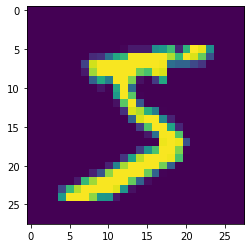

In [ ]:
'''觀察訓練集(x_train) 第一筆資料(圖片)'''
plt.imshow(x_train[0])

In [ ]:
'''觀察訓練集(y_train) 第一筆資料(數字)，看 x 對到的 y 是否正確'''
y_train[0]

5

In [ ]:
'''建立大量觀察原始資料函式'''
def plot_images_labels_original(images,labels,prediction,idx,num):
    fig = plt.gcf() #得到當前的 figure
    fig.set_size_inches(6, 8) #設定顯示圖片大小，預設為 6.4 * 4.8
    if num>25: num=25 #假如顯示筆數超過25，設定為25以免發生錯誤（根據後面 plt.subplot 設定值而變）
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #建立多維視窗，5 plots per row and 5 per column add to a total number of 5*5 = 25
        ax.imshow(images[idx], cmap='binary') #畫出黑白子圖形
        title= "label=" +str(labels[idx]) #設定圖形title內容，先印出圖形的label值
        # 如果有傳入預測值，就再印出預測值
        if len(prediction)>0: 
          title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) #設定子圖形的標題title和大小
        ax.set_xticks([]);ax.set_yticks([]) #設定為不顯示刻度        
        idx+=1 #讀下一筆
    plt.show()

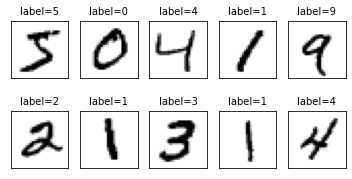

In [ ]:
plot_images_labels_original(x_train,y_train,[],0,10) #觀察訓練集

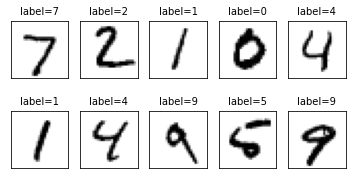

In [ ]:
plot_images_labels_original(x_test,y_test,[],0,10) #觀察測試集

- **資料轉化**

In [ ]:
'''建立資料轉換函式'''
def data_transform():
      # 將x(28*28pixels黑白圖片矩陣)轉為一維784個數字(訓練用特徵)
      x_train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
      x_test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

      # 轉換灰階圖片數值為0-255到0~1
      x_train4D_normalize = x_train4D/255 
      x_test4D_normalize = x_test4D/255

      # y 值轉成 one-hot encoding（類別）
      y_trainOneHot = np_utils.to_categorical(y_train)
      y_testOneHot = np_utils.to_categorical(y_test)

      # 傳回轉換後的訓練及測試集
      return x_train4D_normalize,y_trainOneHot, x_test4D_normalize, y_testOneHot

In [ ]:
'''印出進入模型前的資料外型，訓練60,000筆，測試10,000筆'''
x_train4D_normalize,y_trainOneHot, x_test4D_normalize, y_testOneHot = data_transform()
print('x_train_image:', x_train4D_normalize.shape) 
print('y_train_label:', y_trainOneHot.shape)

print('x_test_image:', x_test4D_normalize.shape)
print('y_test_label:', y_testOneHot.shape)

x_train_image: (60000, 28, 28, 1)
y_train_label: (60000, 10)
x_test_image: (10000, 28, 28, 1)
y_test_label: (10000, 10)


# **建立模型**

In [ ]:
'''選擇性，設定模型訓練時固定起始值，儘量讓模型重跑時結果一致（實務上還是會因為計算晶片不同而有一點點不同）'''
import tensorflow as tf
import random
fixed_seed_num = 2021

np.random.seed(fixed_seed_num)
random.seed(fixed_seed_num)
tf.random.set_seed(fixed_seed_num)

'''導入 keras 及相關模組建立 CNN 模型'''
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D

# **CNN**

In [ ]:
'''建立模型'''
# 調整層數：範例3層Conv2D卷積、1層MaxPooling2D池化、1層Dense全連接
# 調整Node數：範例2層Dropout隨機關掉節點（50%）
# 調整學習率learning_rate：範例0.01
# 調整優化器optimizer：範例Adam，其它還有SGD、RMSprop、Adadelta等（參考Keras API reference > Optimizers）
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.5),

    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# compile(編譯): 選擇損失函數、優化方法及成效衡量方式
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# 印出模型架構
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5184)             

In [ ]:
'''訓練模型，訓練過程會存在 train_history 變數中'''
# 調整batch_sizde：範例2000筆
# 調整epochs：範例20次
train_history = model.fit(x=x_train4D_normalize, y=y_trainOneHot, validation_split=0.2, batch_size=2000, epochs=20, verbose=2)

Epoch 1/20
24/24 - 49s - loss: 1.1455 - accuracy: 0.6392 - val_loss: 0.3399 - val_accuracy: 0.9014
Epoch 2/20
24/24 - 2s - loss: 0.3393 - accuracy: 0.8963 - val_loss: 0.1829 - val_accuracy: 0.9481
Epoch 3/20
24/24 - 2s - loss: 0.2046 - accuracy: 0.9379 - val_loss: 0.1269 - val_accuracy: 0.9630
Epoch 4/20
24/24 - 2s - loss: 0.1471 - accuracy: 0.9555 - val_loss: 0.0953 - val_accuracy: 0.9724
Epoch 5/20
24/24 - 2s - loss: 0.1182 - accuracy: 0.9635 - val_loss: 0.0771 - val_accuracy: 0.9786
Epoch 6/20
24/24 - 2s - loss: 0.0990 - accuracy: 0.9700 - val_loss: 0.0688 - val_accuracy: 0.9799
Epoch 7/20
24/24 - 2s - loss: 0.0846 - accuracy: 0.9736 - val_loss: 0.0588 - val_accuracy: 0.9837
Epoch 8/20
24/24 - 2s - loss: 0.0762 - accuracy: 0.9760 - val_loss: 0.0577 - val_accuracy: 0.9833
Epoch 9/20
24/24 - 2s - loss: 0.0721 - accuracy: 0.9780 - val_loss: 0.0573 - val_accuracy: 0.9829
Epoch 10/20
24/24 - 2s - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0493 - val_accuracy: 0.9849
Epoch 11/20
24/24 

In [ ]:
'''定義訓練、驗證 loss 變化圖含式''' 
images_dir = '/content/drive/MyDrive/Colab Notebooks/images/' # 選擇性，若要將圖存到自己雲端硬碟，需更改成自己的路徑，若不要可將 filename 變數拿掉
def show_train_loss_history(train_loss, val_loss, filename):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[val_loss])
    plt.title('Training and Validation Losses')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    #plt.show()
    plt.savefig(f'{images_dir}'+ 'MNIST_DNN_' + filename +'.jpg')

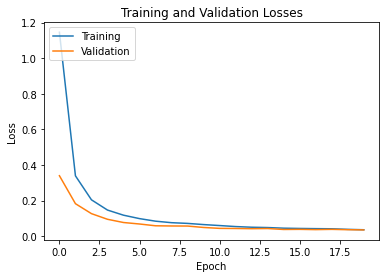

In [ ]:
show_train_loss_history('loss','val_loss', 'train_loss') #畫圖並以 train_loss 為檔名存檔，若想存不同張，記得改檔名

In [ ]:
'''定義訓練、驗證 accuracy 變化圖含式'''
images_dir = '/content/drive/MyDrive/Colab Notebooks/images/' # 選擇性，若要將圖存到自己雲端硬碟，需更改成自己的路徑，若不要可將 filename 變數拿掉
def show_train_accuracy_history(train_acc, val_acc, filename):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_acc])
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    #plt.show()
    plt.savefig(f'{images_dir}'+ 'MNIST_DNN_' + filename +'.jpg')

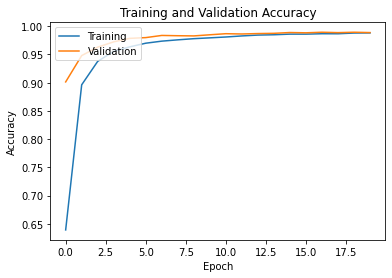

In [ ]:
show_train_accuracy_history('accuracy','val_accuracy','train_accuracy') #畫圖並以 train_accuracy 為檔名存檔，若想存不同張，記得改檔名

# **模型評估與預測**

In [ ]:
'''用測試集評估 CNN 模型結果（分數）'''
scores = model.evaluate(x_test4D_normalize, y_testOneHot)
scores[1]

313/313 [==============================] - 2s 4ms/step - loss: 0.0252 - accuracy: 0.9915


0.9915000200271606

In [ ]:
'''看預測結果'''
y_pred_class = model.predict_classes(x_test4D_normalize)
y_pred_class[:10] #看前10筆

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

- 看label與predict圖

In [ ]:
'''建立大量觀察預測結果函式'''
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #預設畫10張圖
    fig = plt.gcf() #得到當前的 figure
    fig.set_size_inches(10, 12) #設定顯示圖片大小，預設為 6.4 * 4.8
    if num>25: num=25 #假如顯示筆數超過25，設定為25以免發生錯誤（根據後面 plt.subplot 設定值而變）
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #建立多維視窗，5 plots per row and 5 per column add to a total number of 5*5 = 25
        ax.imshow(images[idx], cmap='binary') #畫出黑白子圖形

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)  #設定圖形title內容，印出圖形的標籤 label 及 預測predict
        
        ax.set_xticks([]);ax.set_yticks([]) #設定為不顯示刻度         
        idx+=1 #讀下一筆
    plt.show()

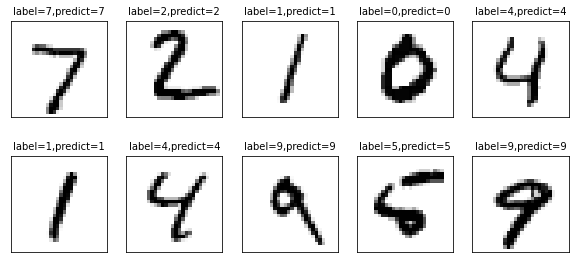

In [ ]:
plot_images_labels_prediction(x_test,y_test,y_pred_class,idx=0)

- 用矩陣看預測結果

In [ ]:
'''使用交叉表觀察 標籤 與 預測結果'''
pd.crosstab(y_test,y_pred_class,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,1,0,0,0,1,1,1,0
1,0,1131,1,1,0,0,1,1,0,0
2,1,1,1025,0,0,0,0,3,2,0
3,0,0,3,998,0,5,0,3,1,0
4,0,0,0,0,977,0,1,0,1,3
5,2,0,0,4,0,881,2,1,0,2
6,5,2,0,0,1,1,948,0,1,0
7,0,3,4,1,0,0,0,1018,1,1
8,3,0,1,1,0,1,0,2,963,3


In [ ]:
'''進一步，建立 標籤 與 預測結果表格，看預測錯誤的 特定標籤 與 特定預測結果資料'''
df = pd.DataFrame({'label':y_test, 'predict':y_pred_class})
df[(df.label==6)&(df.predict==0)] 

,label,predict
259,6,0
445,6,0
965,6,0
2118,6,0
3422,6,0


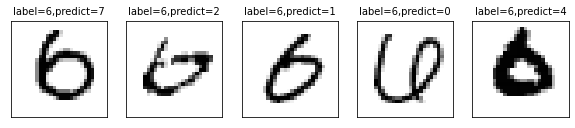

In [ ]:
'''畫預測錯誤的圖，選想觀察的特定資料（用 index）'''
plot_images_labels_prediction(
    [x_test[i] for i in df[(df.label==6)&(df.predict==0)].index], 
    [y_test[i] for i in df[(df.label==6)&(df.predict==0)].index],
    y_pred_class,idx=0,num=5) #num 根據你的資料筆數做調整，預設10張

- 模型存檔

In [ ]:
'''模型結構存檔'''
model.save('/content/drive/MyDrive/Colab Notebooks/models/MNIST_DNN_model.h5')

In [ ]:
# 確認模型是否可順利載入使用
from keras.models import load_model
try:
    model = load_model('/content/drive/MyDrive/Colab Notebooks/models/MNIST_DNN_model.h5')
    print("載入模型成功!繼續訓練模型")
except :
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型
